In [ ]:
!pip install statsbombpy

In [ ]:
!pip install mplsoccer

In [ ]:
from statsbombpy import sb

In [ ]:
sb.matches(competition_id=16,season_id=2)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18244,2017-06-03,20:45:00.000,Europe - Champions League,2016/2017,Juventus,Real Madrid,1,4,available,...,2021-06-13T16:17:31.694,7,Final,Principality Stadium,Felix Brych,Massimiliano Allegri,Zinédine Zidane,1.0.3,None,None


In [ ]:
events = sb.events(match_id = 18244)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [ ]:
events_1=events[events['team']=='Juventus']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Juventus,Starting XI,0,NaN,NaN,NaN,NaN
3,Juventus,Half Start,0,NaN,NaN,NaN,NaN
5,Juventus,Half Start,45,NaN,NaN,NaN,NaN
6,Juventus,Pass,0,"[61.0, 41.0]","[42.0, 45.0]",Paulo Bruno Exequiel Dybala,Leonardo Bonucci
7,Juventus,Pass,0,"[43.0, 45.0]","[87.0, 12.0]",Leonardo Bonucci,Mario Mandžukić
...,...,...,...,...,...,...,...
3391,Juventus,Bad Behaviour,82,NaN,NaN,Juan Guillermo Cuadrado Bello,NaN
3392,Juventus,Substitution,65,NaN,NaN,Andrea Barzagli,NaN
3393,Juventus,Substitution,70,NaN,NaN,Miralem Pjanić,NaN
3395,Juventus,Substitution,77,NaN,NaN,Paulo Bruno Exequiel Dybala,NaN


In [ ]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
3392,Juventus,Substitution,65,NaN,NaN,Andrea Barzagli,NaN
3393,Juventus,Substitution,70,NaN,NaN,Miralem Pjanić,NaN
3395,Juventus,Substitution,77,NaN,NaN,Paulo Bruno Exequiel Dybala,NaN


In [ ]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,6,Juventus,Pass,0,"[61.0, 41.0]","[42.0, 45.0]",Paulo Bruno Exequiel Dybala,Leonardo Bonucci
1,7,Juventus,Pass,0,"[43.0, 45.0]","[87.0, 12.0]",Leonardo Bonucci,Mario Mandžukić
2,8,Juventus,Pass,0,"[86.0, 1.0]","[77.0, 9.0]",Alex Sandro Lobo Silva,Sami Khedira
3,9,Juventus,Pass,0,"[78.0, 9.0]","[92.0, 8.0]",Sami Khedira,Mario Mandžukić
4,12,Juventus,Pass,0,"[64.0, 6.0]","[84.0, 7.0]",Giorgio Chiellini,Mario Mandžukić
...,...,...,...,...,...,...,...,...
437,981,Juventus,Pass,91,"[60.0, 40.0]","[47.0, 44.0]",Sami Khedira,Claudio Marchisio
438,982,Juventus,Pass,91,"[47.0, 44.0]","[98.0, 4.0]",Claudio Marchisio,Alex Sandro Lobo Silva
439,992,Juventus,Pass,92,"[21.0, 53.0]","[49.0, 73.0]",Claudio Marchisio,Daniel Alves da Silva
440,1004,Juventus,Pass,93,"[35.0, 53.0]","[64.0, 70.0]",Claudio Marchisio,Daniel Alves da Silva


In [ ]:
pass_events=pass_events[pass_events['minute']<65]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,6,Juventus,Pass,0,"[61.0, 41.0]","[42.0, 45.0]",Paulo Bruno Exequiel Dybala,Leonardo Bonucci
1,7,Juventus,Pass,0,"[43.0, 45.0]","[87.0, 12.0]",Leonardo Bonucci,Mario Mandžukić
2,8,Juventus,Pass,0,"[86.0, 1.0]","[77.0, 9.0]",Alex Sandro Lobo Silva,Sami Khedira
3,9,Juventus,Pass,0,"[78.0, 9.0]","[92.0, 8.0]",Sami Khedira,Mario Mandžukić
4,12,Juventus,Pass,0,"[64.0, 6.0]","[84.0, 7.0]",Giorgio Chiellini,Mario Mandžukić
...,...,...,...,...,...,...,...,...
330,736,Juventus,Pass,63,"[21.0, 25.0]","[35.0, 17.0]",Alex Sandro Lobo Silva,Mario Mandžukić
331,739,Juventus,Pass,64,"[60.0, 40.0]","[56.0, 68.0]",Paulo Bruno Exequiel Dybala,Daniel Alves da Silva
332,740,Juventus,Pass,64,"[72.0, 71.0]","[56.0, 69.0]",Daniel Alves da Silva,Andrea Barzagli
333,741,Juventus,Pass,64,"[56.0, 64.0]","[48.0, 49.0]",Andrea Barzagli,Leonardo Bonucci


In [ ]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Alex Sandro Lobo Silva,Daniel Alves da Silva,1
1,Alex Sandro Lobo Silva,Giorgio Chiellini,2
2,Alex Sandro Lobo Silva,Gonzalo Gerardo Higuaín,2
3,Alex Sandro Lobo Silva,Leonardo Bonucci,2
4,Alex Sandro Lobo Silva,Mario Mandžukić,10
...,...,...,...
82,Sami Khedira,Gonzalo Gerardo Higuaín,3
83,Sami Khedira,Leonardo Bonucci,3
84,Sami Khedira,Mario Mandžukić,7
85,Sami Khedira,Miralem Pjanić,6


In [ ]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [ ]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game= game[game['type']>3]
game

,player,pass_recipient,type
4,Alex Sandro Lobo Silva,Mario Mandžukić,13
5,Alex Sandro Lobo Silva,Miralem Pjanić,4
7,Alex Sandro Lobo Silva,Sami Khedira,10
9,Andrea Barzagli,Daniel Alves da Silva,7
12,Andrea Barzagli,Leonardo Bonucci,5
13,Andrea Barzagli,Miralem Pjanić,5
14,Andrea Barzagli,Paulo Bruno Exequiel Dybala,4
21,Daniel Alves da Silva,Miralem Pjanić,8
22,Daniel Alves da Silva,Paulo Bruno Exequiel Dybala,17
24,Gianluigi Buffon,Alex Sandro Lobo Silva,7


In [ ]:
desc=game.describe()

In [ ]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [ ]:
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>=thresh].reset_index(drop=True)
game.describe()

In [ ]:
game

,player,pass_recipient,pass_count
4,Alex Sandro Lobo Silva,Mario Mandžukić,13
5,Alex Sandro Lobo Silva,Miralem Pjanić,4
7,Alex Sandro Lobo Silva,Sami Khedira,10
9,Andrea Barzagli,Daniel Alves da Silva,7
12,Andrea Barzagli,Leonardo Bonucci,5
13,Andrea Barzagli,Miralem Pjanić,5
14,Andrea Barzagli,Paulo Bruno Exequiel Dybala,4
21,Daniel Alves da Silva,Miralem Pjanić,8
22,Daniel Alves da Silva,Paulo Bruno Exequiel Dybala,17
24,Gianluigi Buffon,Alex Sandro Lobo Silva,7


,pass_count
count,39.000000
mean,6.333333
std,2.794104
min,4.000000
25%,4.000000
50%,5.000000
75%,7.500000
max,17.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Alex Sandro Lobo Silva,Mario Mandžukić,6.923077
1,Alex Sandro Lobo Silva,Miralem Pjanić,0.000000
2,Alex Sandro Lobo Silva,Sami Khedira,4.615385
3,Andrea Barzagli,Daniel Alves da Silva,2.307692
4,Andrea Barzagli,Leonardo Bonucci,0.769231
5,Andrea Barzagli,Miralem Pjanić,0.769231
6,Andrea Barzagli,Paulo Bruno Exequiel Dybala,0.000000
7,Daniel Alves da Silva,Miralem Pjanić,3.076923
8,Daniel Alves da Silva,Paulo Bruno Exequiel Dybala,10.000000
9,Gianluigi Buffon,Alex Sandro Lobo Silva,2.307692


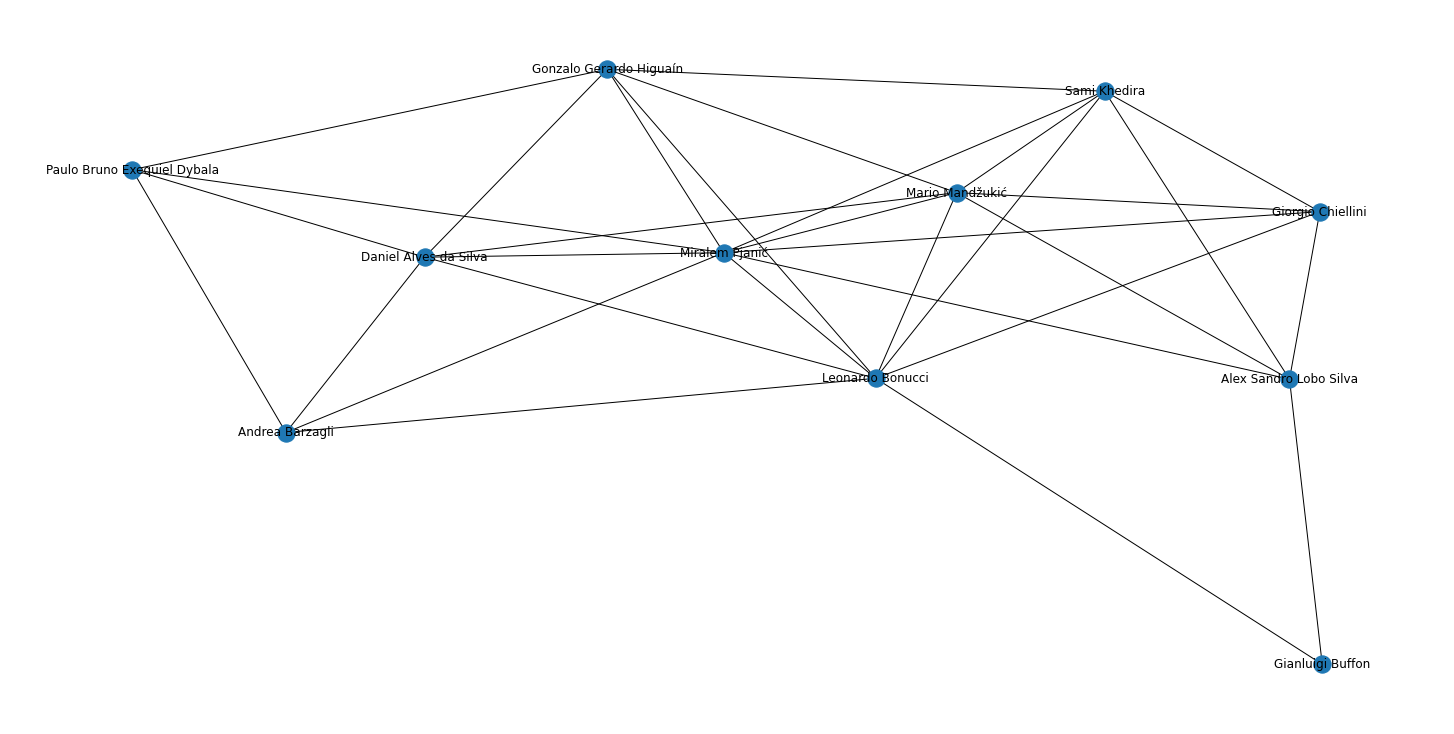

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

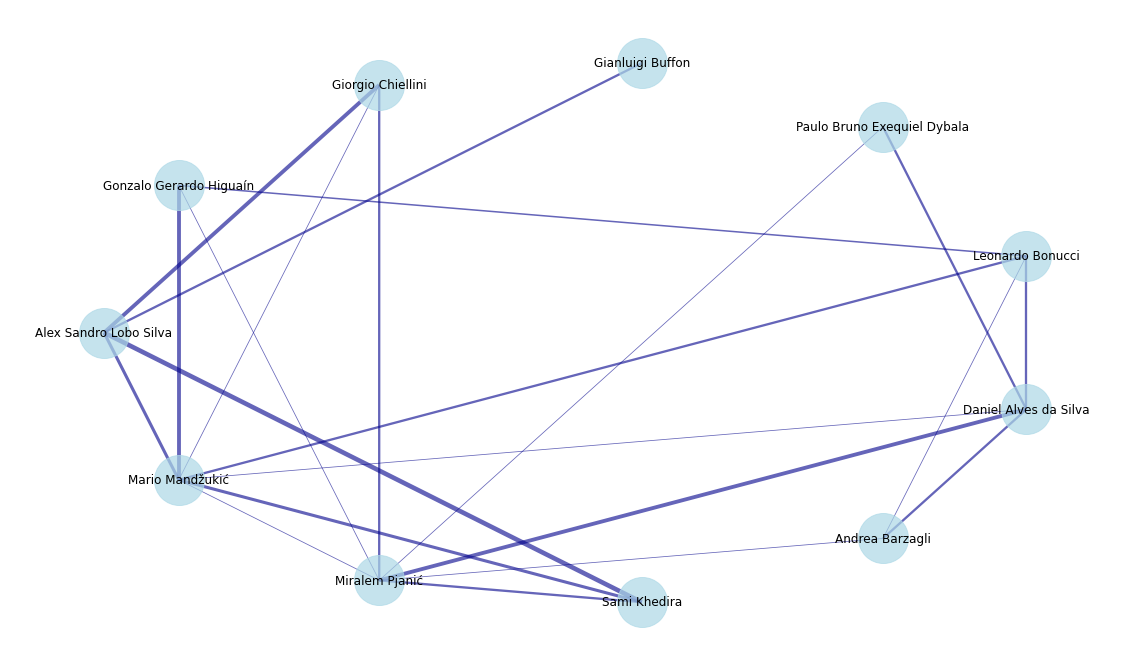

In [ ]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [ ]:
game.player.nunique()

11

In [ ]:
events_1=events_1[events_1['type']=='Pass']

In [ ]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
6,Juventus,Pass,0,"[61.0, 41.0]","[42.0, 45.0]",Paulo Bruno Exequiel Dybala,Leonardo Bonucci
7,Juventus,Pass,0,"[43.0, 45.0]","[87.0, 12.0]",Leonardo Bonucci,Mario Mandžukić
8,Juventus,Pass,0,"[86.0, 1.0]","[77.0, 9.0]",Alex Sandro Lobo Silva,Sami Khedira
9,Juventus,Pass,0,"[78.0, 9.0]","[92.0, 8.0]",Sami Khedira,Mario Mandžukić
12,Juventus,Pass,0,"[64.0, 6.0]","[84.0, 7.0]",Giorgio Chiellini,Mario Mandžukić
...,...,...,...,...,...,...,...
981,Juventus,Pass,91,"[60.0, 40.0]","[47.0, 44.0]",Sami Khedira,Claudio Marchisio
982,Juventus,Pass,91,"[47.0, 44.0]","[98.0, 4.0]",Claudio Marchisio,Alex Sandro Lobo Silva
992,Juventus,Pass,92,"[21.0, 53.0]","[49.0, 73.0]",Claudio Marchisio,Daniel Alves da Silva
1004,Juventus,Pass,93,"[35.0, 53.0]","[64.0, 70.0]",Claudio Marchisio,Daniel Alves da Silva


In [ ]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
6,Juventus,Pass,0,"[61.0, 41.0]","[42.0, 45.0]",Paulo Bruno Exequiel Dybala,Leonardo Bonucci
7,Juventus,Pass,0,"[43.0, 45.0]","[87.0, 12.0]",Leonardo Bonucci,Mario Mandžukić
8,Juventus,Pass,0,"[86.0, 1.0]","[77.0, 9.0]",Alex Sandro Lobo Silva,Sami Khedira
9,Juventus,Pass,0,"[78.0, 9.0]","[92.0, 8.0]",Sami Khedira,Mario Mandžukić
12,Juventus,Pass,0,"[64.0, 6.0]","[84.0, 7.0]",Giorgio Chiellini,Mario Mandžukić
...,...,...,...,...,...,...,...
981,Juventus,Pass,91,"[60.0, 40.0]","[47.0, 44.0]",Sami Khedira,Claudio Marchisio
982,Juventus,Pass,91,"[47.0, 44.0]","[98.0, 4.0]",Claudio Marchisio,Alex Sandro Lobo Silva
992,Juventus,Pass,92,"[21.0, 53.0]","[49.0, 73.0]",Claudio Marchisio,Daniel Alves da Silva
1004,Juventus,Pass,93,"[35.0, 53.0]","[64.0, 70.0]",Claudio Marchisio,Daniel Alves da Silva


In [ ]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
6,Juventus,Pass,0,"[61.0, 41.0]","[42.0, 45.0]",Paulo Bruno Exequiel Dybala,Leonardo Bonucci,61.0,41.0
7,Juventus,Pass,0,"[43.0, 45.0]","[87.0, 12.0]",Leonardo Bonucci,Mario Mandžukić,43.0,45.0
8,Juventus,Pass,0,"[86.0, 1.0]","[77.0, 9.0]",Alex Sandro Lobo Silva,Sami Khedira,86.0,1.0
9,Juventus,Pass,0,"[78.0, 9.0]","[92.0, 8.0]",Sami Khedira,Mario Mandžukić,78.0,9.0
12,Juventus,Pass,0,"[64.0, 6.0]","[84.0, 7.0]",Giorgio Chiellini,Mario Mandžukić,64.0,6.0
...,...,...,...,...,...,...,...,...,...
981,Juventus,Pass,91,"[60.0, 40.0]","[47.0, 44.0]",Sami Khedira,Claudio Marchisio,60.0,40.0
982,Juventus,Pass,91,"[47.0, 44.0]","[98.0, 4.0]",Claudio Marchisio,Alex Sandro Lobo Silva,47.0,44.0
992,Juventus,Pass,92,"[21.0, 53.0]","[49.0, 73.0]",Claudio Marchisio,Daniel Alves da Silva,21.0,53.0
1004,Juventus,Pass,93,"[35.0, 53.0]","[64.0, 70.0]",Claudio Marchisio,Daniel Alves da Silva,35.0,53.0


In [ ]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Alex Sandro Lobo Silva,70.042553,10.851064
1,Andrea Barzagli,56.000000,70.178571
2,Claudio Marchisio,54.526316,39.631579
3,Daniel Alves da Silva,68.037037,66.074074
4,Gianluigi Buffon,11.208333,39.958333
5,Giorgio Chiellini,45.404762,23.404762
6,Gonzalo Gerardo Higuaín,83.733333,47.133333
7,Juan Guillermo Cuadrado Bello,66.333333,62.000000
8,Leonardo Bonucci,43.043478,56.456522
9,Mario Lemina,72.200000,40.000000


In [ ]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [ ]:
df3

,player,locationx,locationy
0,Alex Sandro Lobo Silva,70.042553,10.851064
1,Andrea Barzagli,56.000000,70.178571
2,Daniel Alves da Silva,68.037037,66.074074
3,Gianluigi Buffon,11.208333,39.958333
4,Giorgio Chiellini,45.404762,23.404762
5,Gonzalo Gerardo Higuaín,83.733333,47.133333
6,Leonardo Bonucci,43.043478,56.456522
7,Mario Mandžukić,75.435897,15.641026
8,Miralem Pjanić,57.803922,44.803922
9,Paulo Bruno Exequiel Dybala,71.466667,49.900000


In [ ]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Alex Sandro Lobo Silva,70.042553,10.851064,89.148936
1,Andrea Barzagli,56.000000,70.178571,29.821429
2,Daniel Alves da Silva,68.037037,66.074074,33.925926
3,Gianluigi Buffon,11.208333,39.958333,60.041667
4,Giorgio Chiellini,45.404762,23.404762,76.595238
5,Gonzalo Gerardo Higuaín,83.733333,47.133333,52.866667
6,Leonardo Bonucci,43.043478,56.456522,43.543478
7,Mario Mandžukić,75.435897,15.641026,84.358974
8,Miralem Pjanić,57.803922,44.803922,55.196078
9,Paulo Bruno Exequiel Dybala,71.466667,49.900000,50.100000


In [ ]:
df3.set_index('player',inplace=True)

In [ ]:

!pip install highlight_text

In [ ]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


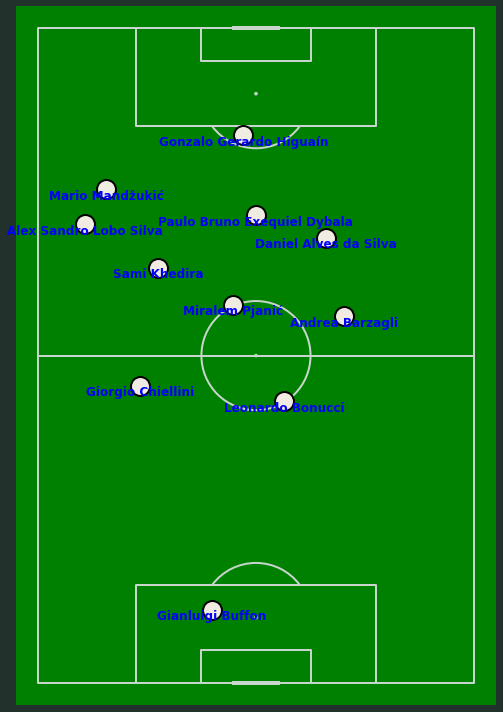

In [ ]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [ ]:
nx.write_gml(G, "JuventusvsRealmadrid(JUV).gml")